In [58]:
%pylab inline
import numpy as np
import pylab
try:
    import seaborn as sns  # optional; prettier graphs
except ImportError:
    pass

import nengolib
import nengo

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


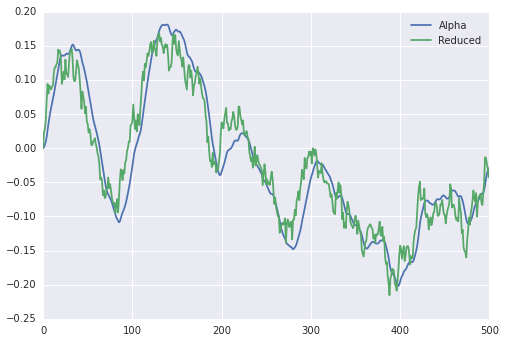

In [55]:
#synapse = nengolib.Alpha(0.1)
tau1 = 0.01
tau2 = 0.05
synapse = (tau1 * nengolib.Lowpass(tau1) - tau2 * nengolib.Lowpass(tau2)) / (tau1 - tau2)

reduced = nengolib.signal.balred(synapse, 1, method='del')
#reduced = nengolib.Lowpass(0.01)

dt = 0.001
seed = 0
rng = np.random.RandomState(seed)
u = rng.normal(size=500)

y = nengolib.signal.apply_filter(synapse, dt, u)
y_est = nengolib.signal.apply_filter(reduced, dt, u)

pylab.figure()
pylab.plot(y, label="Alpha")
pylab.plot(y_est, label="Reduced")
pylab.legend()
pylab.show()

In [56]:
print reduced
print synapse


([ 13.3630621], [  1.          11.89297646])
([ 2000.], [  1.00000000e+00   1.20000000e+02   2.00000000e+03])


In [59]:
print nengolib.signal.cont2discrete(~nengolib.signal.s, dt=0.001)
print nengolib.signal.cont2discrete(nengo.Lowpass(0.1), dt=0.001)

([ 0.001], [ 1. -1.])
([ 0.00995017], [ 1.         -0.99004983])


In [61]:
spiked = np.array([True, False, False, True, False])
voltage = np.array([1, 2, 3, 4, 5])
dV = np.array([0.2, 0.1, 0.5, 0.4, 0.6])

overshoot = (voltage[spiked > 0] - 1) / dV[spiked > 0]
spiketime = dt * (1 - overshoot)

print overshoot, spiketime

[ 0.   7.5] [ 0.001  -0.0065]
